In [1]:
import torch
import torchvision.transforms as transforms
from PIL import Image

In [2]:
content_img = Image.open("images/content/golden_gate.jpg")
style_img = Image.open("images/style/sketch.png")

# Preprocess the images
preprocess = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

content_tensor = preprocess(content_img).unsqueeze(0)
style_tensor = preprocess(style_img).unsqueeze(0)

print("content_tensor:", content_tensor.shape)
print("style_tensor:", style_tensor.shape)


content_tensor: torch.Size([1, 3, 32, 32])
style_tensor: torch.Size([1, 3, 32, 32])


In [22]:
from encoder import Encoder

encoder = Encoder()



[0, 1]


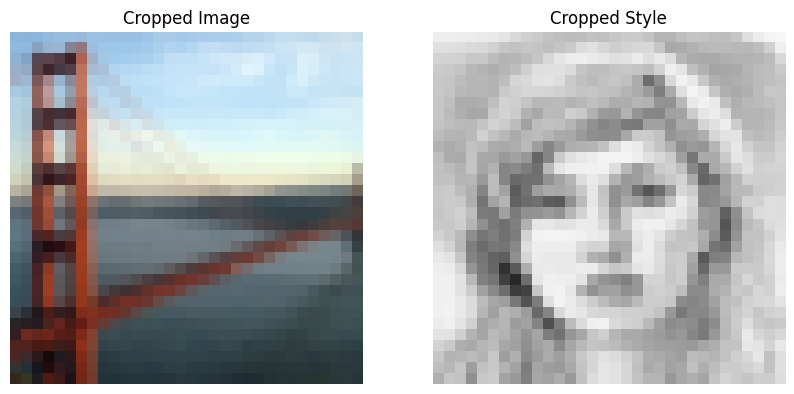

In [3]:
from plot_tools import *
plot_img(content_tensor, style_tensor)


In [4]:
from model import StyleTransfer
model = StyleTransfer()

encoded = model.encoder(content_tensor)
print(encoded.shape)
decoded = model.decoder(encoded)
print(decoded.shape)

Using cache found in /Users/gurvanrichardeau/.cache/torch/hub/pytorch_vision_v0.9.0
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 512, 2, 2])
torch.Size([1, 3, 32, 32])


In [10]:
print(torch.mean(encoded, dim=[2,3], keepdim=True).shape)

torch.Size([1, 512, 1, 1])


In [12]:
import torch.nn.functional as F
print(F.mse_loss(encoded, encoded, reduction='sum').shape)

torch.Size([])


In [14]:
print(model.encoder[30])

TypeError: 'Encoder' object is not subscriptable

In [18]:

vgg = torch.hub.load('pytorch/vision:v0.9.0', 'vgg19', pretrained=True)
vgg = torch.nn.Sequential(*list(vgg.features.children()))

Using cache found in /Users/gurvanrichardeau/.cache/torch/hub/pytorch_vision_v0.9.0
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo